<a href="https://www.kaggle.com/code/vedatgul/number-classification-with-ann?scriptVersionId=158282339" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Number Classification with ANN

Project Description:
In this project, developed a model that automatically classifies numbers using ANN. The model was trained and successfully tested using the MNIST dataset. Number classification models are an important technology that can be used in many areas, from optical character recognition (OCR) applications to recognizing numbers in financial documents.

Technologies Used:
The project used TensorFlow and Keras, a popular deep learning library in Python programming language. The MNIST dataset was preferred for training and the accuracy of the model was satisfactory.

Application Areas:
Such models can be used in many areas such as check recognition in the banking sector, package labeling in the logistics sector, license plate recognition in the automotive sector. Classification models have the potential to optimize business processes by offering a wide range of applications.

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras. layers import Conv2D, MaxPooling2D
from keras import backend as K

import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


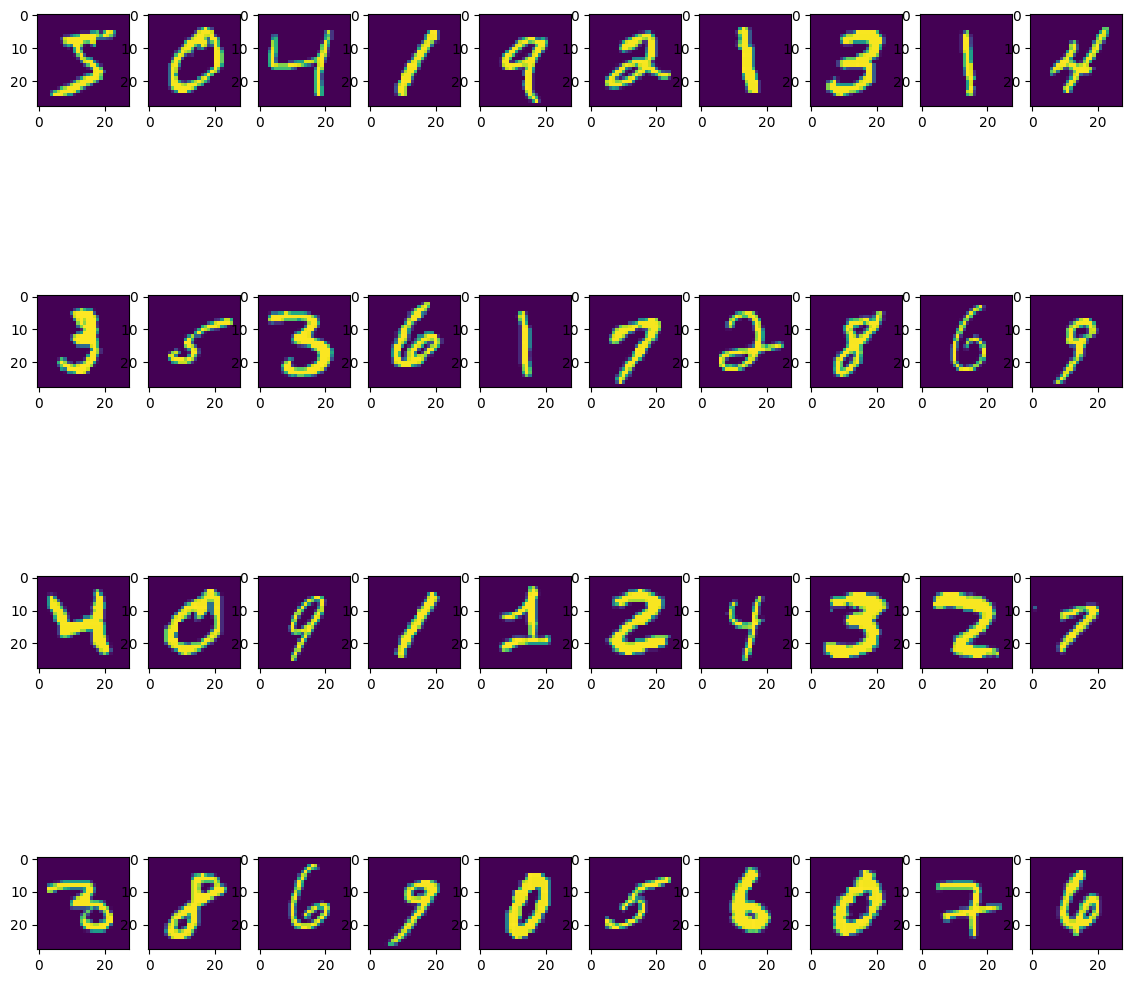

In [3]:
plt.figure(figsize=(14,14))
x, y = 10, 4 
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i])
plt.show()

In [4]:
batch_size = 128 
num_classes = 10 
epochs = 6 

img_rows, img_cols = 28, 28


if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [5]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# CREATING A MODEL

In [6]:
model = Sequential() 
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

 
model.add(Conv2D(64, (3, 3), activation='relu'))


model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Dropout(0.25))


model.add(Flatten())


model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))


model.add(Dense(num_classes, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [8]:
model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.Adadelta(),
             metrics = ['accuracy'])

# EDUCATION PROCEDURES

In [9]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/6


2024-01-09 09:45:48.730624: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


469/469 [==============================] - 8s 10ms/step - loss: 18.4945 - accuracy: 0.1494 - val_loss: 3.2876 - val_accuracy: 0.4056
Epoch 2/6
469/469 [==============================] - 4s 8ms/step - loss: 8.3203 - accuracy: 0.2475 - val_loss: 1.5525 - val_accuracy: 0.5451
Epoch 3/6
469/469 [==============================] - 4s 8ms/step - loss: 4.3962 - accuracy: 0.3044 - val_loss: 1.3159 - val_accuracy: 0.5523
Epoch 4/6
469/469 [==============================] - 4s 8ms/step - loss: 2.8436 - accuracy: 0.3309 - val_loss: 1.4544 - val_accuracy: 0.5240
Epoch 5/6
469/469 [==============================] - 4s 8ms/step - loss: 2.2745 - accuracy: 0.3404 - val_loss: 1.5369 - val_accuracy: 0.5079
Epoch 6/6
469/469 [==============================] - 4s 8ms/step - loss: 2.0385 - accuracy: 0.3596 - val_loss: 1.5217 - val_accuracy: 0.5702


In [10]:
model.save('save_models/mnist_model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Test Loss: 1.52169668674469
Test Accuracy: 0.5702000260353088


# TESTING FOR RANDOM VALUE

In [12]:
test_image = x_test[15]
y_test[32]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

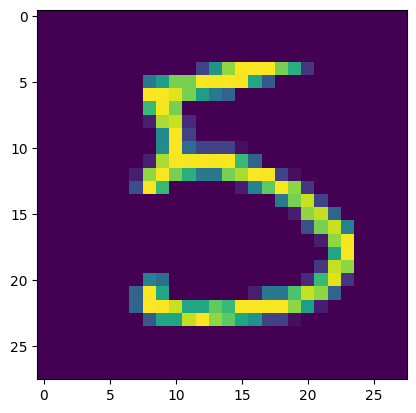

In [13]:
plt.imshow(test_image.reshape(28,28))

In [14]:
model_test = load_model('save_models/mnist_model.h5')

In [15]:
test_data = x_test[32].reshape(1,28,28,1)
pre=model_test.predict(test_data, batch_size=1)

1/1 [==============================] - 0s 168ms/step
